In [1]:
import dlsfunctions as dls
import initialization_data as init
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time = init.get_time()
d = init.get_distance()

gamma = init.get_gamma()

mean = init.get_left_mean()

sigma = init.get_normal_sigma()

m = init.m
c = init.c
beta = init.beta

f = dls.generate_distribution(d, mean, sigma, c)
noise = np.random.normal(mean, sigma, 200)*1e7

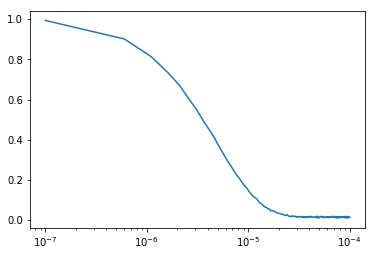

In [3]:
theta_input = np.append(f, beta)
sim_data = dls.g2(theta_input, d, m, gamma, time) + noise
plt.semilogx(time, sim_data)

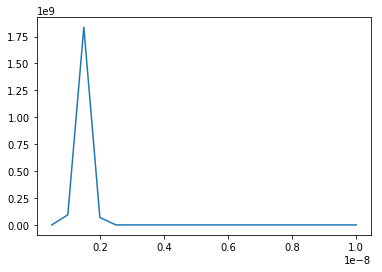

In [4]:
plt.plot(d, f)

In [5]:
ndim = 21
nwalkers = 100
nsteps = 1000

In [7]:
start_pos = dls.create_start_pos(theta_input, ndim, nwalkers)
sampler = dls.create_sampler(nwalkers, ndim, d, sim_data, m, gamma, time)

In [8]:
result = dls.infer(sampler, start_pos, nsteps)
result.acceptance_fraction

array([0.33 , 0.36 , 0.347, 0.375, 0.376, 0.337, 0.358, 0.375, 0.363,
       0.37 , 0.342, 0.334, 0.377, 0.337, 0.38 , 0.347, 0.384, 0.341,
       0.382, 0.347, 0.353, 0.355, 0.354, 0.405, 0.359, 0.367, 0.367,
       0.337, 0.374, 0.377, 0.341, 0.361, 0.322, 0.369, 0.364, 0.357,
       0.343, 0.391, 0.347, 0.379, 0.36 , 0.346, 0.373, 0.372, 0.361,
       0.345, 0.354, 0.373, 0.35 , 0.384, 0.357, 0.361, 0.325, 0.354,
       0.37 , 0.379, 0.343, 0.369, 0.318, 0.377, 0.367, 0.351, 0.37 ,
       0.399, 0.314, 0.374, 0.404, 0.329, 0.359, 0.37 , 0.324, 0.335,
       0.324, 0.376, 0.349, 0.326, 0.333, 0.363, 0.374, 0.351, 0.377,
       0.342, 0.379, 0.359, 0.346, 0.36 , 0.385, 0.368, 0.359, 0.313,
       0.358, 0.392, 0.344, 0.359, 0.369, 0.366, 0.355, 0.357, 0.382,
       0.376])

/usr/local/lib/python2.7/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


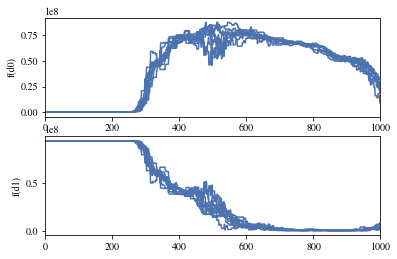

In [9]:
dls.view_burnin_plot(result, 0, 1)

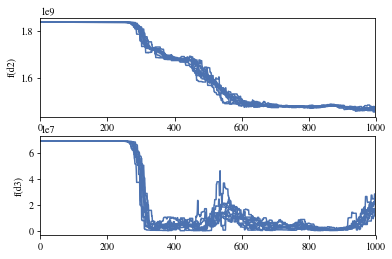

In [10]:
dls.view_burnin_plot(result, 2, 3)

In [11]:
chained_sampler = dls.chain(result, 850, ndim)

In [12]:
samples_df = dls.create_dataframe(chained_sampler, ndim)
samples = samples_df.quantile([0.5], axis=0)
samples

,f0,f1,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f2,f3,f4,f5,f6,f7,f8,f9
0.5,5.021228e+07,425323.046963,1.172291e+08,4.380290e+07,1.834426e+08,6.293208e+07,5.736923e+08,3.572469e+08,1.198640e+08,2.854371e+08,1.447884e+08,641805.84043,1.476077e+09,2.295208e+06,3.535200e+08,6.036643e+06,2.410004e+08,2.102881e+08,1.450710e+07,1.279142e+08


In [13]:
infer = np.zeros(20)
infer[0] = 5.021228e+07
infer[1] = 425323.046963
infer[2] = 1.476077e+09
infer[3] = 2.295208e+06
infer[4] = 3.535200e+08
infer[5] = 6.036643e+06
infer[6] = 2.410004e+08
infer[7] = 2.102881e+08
infer[8] = 1.450710e+07
infer[9] = 1.279142e+08
infer[10] = 1.172291e+08
infer[11] = 4.380290e+07
infer[12] = 1.834426e+08
infer[13] = 6.293208e+07
infer[14] = 5.736923e+08
infer[15] = 3.572469e+08
infer[16] = 1.198640e+08
infer[17] = 2.854371e+08
infer[18] = 1.447884e+08
infer[19] = 641805.84043


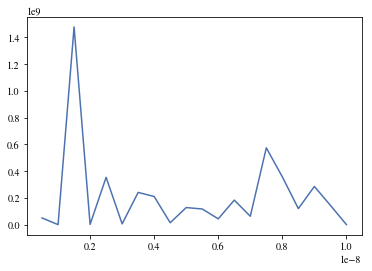

In [14]:
plt.plot(d, infer)

In [15]:
beta_samples = dls.get_beta(chained_sampler, ndim)

In [16]:
beta_infer = beta_samples.quantile([0.5], axis=0)
beta_infer

,beta
0.5,0.752048


In [18]:
beta_infer = beta_infer.values.flatten()

In [19]:
beta_infer

array([0.75204809])

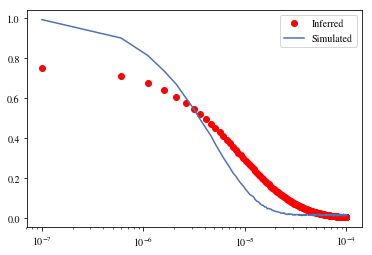

In [20]:
theta_infer = np.append(infer, beta_infer)
inferg2 = dls.g2(theta_infer, d, m, gamma, time)
plt.semilogx(time, inferg2, 'ro', label='Inferred')
plt.semilogx(time, sim_data, label='Simulated')
plt.legend()

In [23]:
beta_posterior = beta_samples.values.flatten()

In [24]:
beta_posterior

array([1.71173819, 1.71173819, 1.71173819, ..., 0.56713347, 0.56713347,
       0.56713347])

(array([1486., 1686., 2538., 2287., 1663., 1214., 1117., 1312., 1196.,
         501.]),
 array([1.38986952e-03, 2.01144959e-01, 4.00900048e-01, 6.00655137e-01,
        8.00410227e-01, 1.00016532e+00, 1.19992041e+00, 1.39967549e+00,
        1.59943058e+00, 1.79918567e+00, 1.99894076e+00]),
 <a list of 10 Patch objects>)

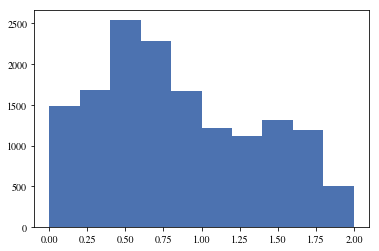

In [25]:
plt.hist(beta_posterior)

In [26]:
sigma

2e-10

In [27]:
mean

1.487921647029171e-09